In [1]:
%matplotlib inline

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iso639_3 = {
    'engelsk': 'eng',
    'polsk': 'pol',
    'russisk': 'rus',
    'somali': 'som',
    'spansk': 'spa',
    'tysk': 'deu',
    'vietnamesisk': 'vie'
}

In [4]:
df = pd.read_csv('metadata.csv')

In [39]:
def heatmap(values, xticks, yticks, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.imshow(values, cmap='viridis')
    ax.set_yticks(range(len(yticks)))
    ax.set_xticks(range(len(xticks)))
    ax.set_yticklabels(yticks)
    ax.set_xticklabels(xticks)

    col_cutoff = values.max().max() / 2

    for i, row in enumerate(values.itertuples()):
        for j, count in enumerate(row[1:]):
            col = 'white' if count < col_cutoff else 'black'
            ax.text(j, i, int(count),
                    horizontalalignment='center',
                    verticalalignment='center', color=col)

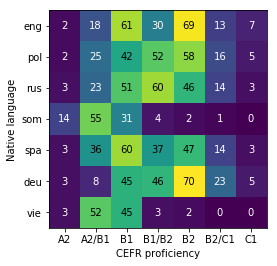

In [40]:
counts = df.groupby(['lang', 'cefr']).size().unstack().fillna(0)

heatmap(counts, counts.columns, [iso639_3[l] for l in counts.index])

plt.ylabel('Native language')
plt.xlabel('CEFR proficiency')

plt.show()

In [35]:
counts = df.groupby(['testlevel', 'lang']).size().unstack().fillna(0)
counts.columns = [iso639_3[l] for l in counts.columns]
counts.columns.name = 'L1'
counts.index.name = 'Test level'
counts

L1,eng,pol,rus,som,spa,deu,vie
Test level,,,,,,,
Høyere nivå,100,100,100,7,100,100,5
Språkprøven,100,100,100,100,100,100,100


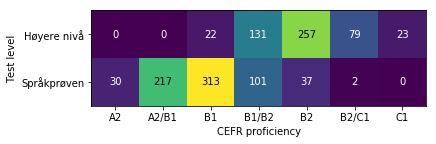

In [67]:
counts = df.groupby(['testlevel', 'cefr']).size().unstack().fillna(0)

heatmap(counts, counts.columns, counts.index)

plt.ylabel('Test level')
plt.xlabel('CEFR proficiency');

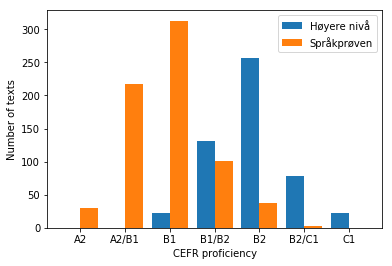

In [80]:
width = 0.4
xs = np.arange(len(counts.columns))
plt.bar(xs, counts.iloc[0], width=width, label=counts.index[0])
plt.bar(xs + width, counts.iloc[1], width=width, label=counts.index[1])
plt.xticks(xs + (width / 2), counts.columns)
plt.ylabel("Number of texts")
plt.xlabel("CEFR proficiency")
plt.legend();

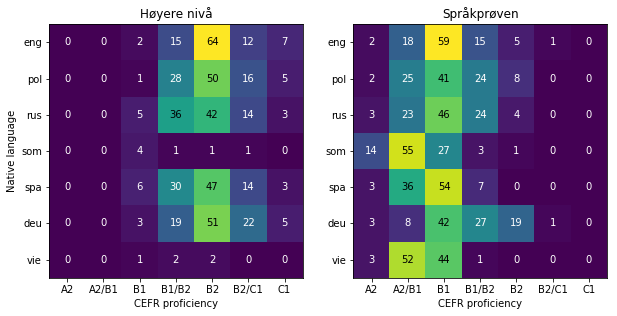

In [61]:
groups = df.groupby('testlevel')
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10,6)

columns = ['A2', 'A2/B1', 'B1', 'B1/B2', 'B2', 'B2/C1', 'C1']

for ax, (testlevel, group) in zip(axes, groups):
    counts = group.groupby(['lang', 'cefr']).size().unstack().fillna(0)
    for col in columns:
        if col not in counts.columns:
            counts[col] = 0
    counts = counts[columns]

    heatmap(counts, columns, [iso639_3[l] for l in counts.index], ax=ax)
    ax.set_title(testlevel)

axes[0].set_ylabel('Native language')
axes[0].set_xlabel('CEFR proficiency')
axes[1].set_xlabel('CEFR proficiency')

plt.show()